In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data
data = pd.read_csv('data.csv')

In [116]:
data.columns

Index(['Unnamed: 0', 'Vital', 'M(T2P)', 'Complaint Date', 'Tag No', 'Machine ',
       'Fault'],
      dtype='object')

In [117]:
# Dropping Unnecassary Column
data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [118]:
data.head()

,Vital,M(T2P),Complaint Date,Tag No,Machine,Fault
0,N,E(BC),11/11/2020,BC1-02,Battery Car,Batteries Replaceable
1,N,E(T),10/6/2020,A1-5-5,Test Stand For Reducer lead,Switch Faulty
2,N,M(T2),2/25/2021,A1-4-2A,15 Ton Doble Hook Crane,Large Hook Fqaulty
3,N,M(T2),3/1/2021,A1-2-50,Gun Assy Trolly with stand,Compound plate broken
4,N,M(T2),3/2/2021,A1-2-33,Eng Lathe M/c,Threading dial faulty


In [119]:
# check null values

data.isnull().sum()

Vital             0
M(T2P)            0
Complaint Date    0
Tag No            0
Machine           0
Fault             3
dtype: int64

In [120]:
data.shape

(6296, 6)

In [121]:
# check duplicates

#data.drop_duplicates(inplace=True,)

In [122]:
data.shape

(6296, 6)

In [123]:
# Make Seprate Columns for Year Date and Month
data['Month'] = data['Complaint Date'].str.split('/').str[0]
data['Day'] = data['Complaint Date'].str.split('/').str[1]
data['Year'] = data['Complaint Date'].str.split('/').str[2]




In [124]:
#dropping data that is older than 2019

data = data[data['Year'] > '2018']

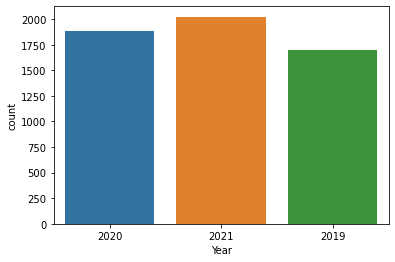

In [125]:
# check Error counts by Year

sns.countplot(x=data['Year'])
plt.show()

In [126]:

# Sort The Tags No Based on Most Faults

most_fault_machines = data['Tag No'].value_counts()


In [127]:
# Making E and M Fault
most_common_faults = data['Fault'].value_counts()
most_common_faults

Elect Faulty                                      171
Elect Fault                                       152
Elect fault                                       112
Elect Faulty                                       81
Regulator Faulty                                   78
                                                 ... 
AC Contactor burnt                                  1
Drain Pipe Block Secound stange let water out       1
Heater Fault                                        1
steam vale leakage                                  1
Stroke Faulty                                       1
Name: Fault, Length: 1334, dtype: int64

In [128]:
data.shape

(5607, 9)

In [131]:
data['M(T2P)'].unique()

array(['E(BC)', 'E(T)', 'M(T2)', 'M(T2P)', 'E(D)', 'M(T1)', 'Veh(Lift)'],
      dtype=object)

Lets keep only E and M 

In [132]:
# Working On E and M Column

#data['M(T2P)'] = data['M(T2P)'].apply(lambda x: 'E' if (x[0] == 'E') else x)
#data['M(T2P)'] = data['M(T2P)'].apply(lambda x: 'M' if (x[0] == 'M') else x)
#data = data[data['M(T2P)'] != 'Veh(Lift)']

<AxesSubplot:xlabel='M(T2P)', ylabel='count'>

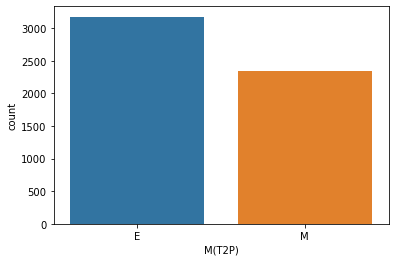

In [151]:
sns.countplot(x=data['M(T2P)'])

In [153]:
# Value Counts of Fault

data['Fault'].value_counts()

Elect Faulty                                      171
Elect Fault                                       152
Electric Fault                                    150
Elect fault                                       112
Regulator Faulty                                   78
                                                 ... 
Drain Pipe Block Secound stange let water out       1
Broaching sporting stand broken                     1
Leakge faulty                                       1
AC Contactor burnt                                  1
Stroke Faulty                                       1
Name: Fault, Length: 1310, dtype: int64

Now we can see We have spelling mistake for same mistake:
Lets correct them:

In [149]:
data['Fault'] = data['Fault'].apply(lambda x: 'Electric Fault' if (x == 'Elect Faulty') else x)
#data['Fault'] = data['Fault'].apply(lambda x: 'Electric Fault' if (x == 'Elect Fault') else x)



In [150]:

data['Fault'].value_counts()

Elect Faulty                                      171
Elect Fault                                       152
Electric Fault                                    150
Elect fault                                       112
Regulator Faulty                                   78
                                                 ... 
Drain Pipe Block Secound stange let water out       1
Broaching sporting stand broken                     1
Leakge faulty                                       1
AC Contactor burnt                                  1
Stroke Faulty                                       1
Name: Fault, Length: 1310, dtype: int64

In [3]:
faults = data['Fault']

In [6]:
faults.to_csv('fautls.csv')